In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd "/content/gdrive/MyDrive/AI-Thinking-Data"

Mounted at /content/gdrive
/content/gdrive/.shortcut-targets-by-id/1EH1SqwJ8QqFAhAXhp4Xs80aQOOfssre8/AI-Thinking-Data


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [10]:
df = pd.read_csv('creditcard.csv')

In [11]:
df.sample(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
188471,127990.0,0.560973,0.230900,-0.510425,0.728107,0.778485,0.632004,0.816910,-0.231283,0.092254,...,0.475641,1.731179,-0.137414,-1.388475,-0.964000,-0.053072,0.186210,0.056310,87.94,0
208847,137298.0,-0.847229,1.114503,1.358786,-0.367983,-0.222470,-0.182499,0.098992,0.438003,-0.063659,...,-0.026354,-0.154383,0.023564,1.079465,-0.327474,-0.597865,-0.088984,0.086431,4.99,0
218792,141461.0,1.836604,-0.506442,-0.304520,1.245237,-0.538571,0.378719,-0.812971,0.344142,1.114945,...,0.254551,0.742915,0.144376,0.650162,-0.147909,-0.577928,0.041344,-0.031936,39.00,0
8460,11346.0,-0.263573,0.631301,2.229624,1.314622,0.240997,0.496810,0.491541,-0.210064,1.426300,...,-0.155993,0.277444,-0.273696,0.154094,0.101426,-0.292814,-0.434529,-0.456853,9.99,0
87567,61743.0,-0.329585,0.828113,1.366423,0.269591,0.349281,-0.266279,0.880338,-0.190481,0.034731,...,-0.264058,-0.782238,-0.160533,-0.567563,-0.092732,-0.654067,-0.230579,-0.168332,25.20,0
247237,153514.0,2.076885,-0.082556,-2.075305,0.210604,0.560007,-0.824945,0.426957,-0.199523,0.139012,...,0.132606,0.447617,0.023670,0.742490,0.292065,0.668807,-0.129195,-0.092199,0.76,0
29005,35273.0,-8.313402,-6.270720,-1.333801,0.218199,-1.101031,-0.327100,-0.677812,1.073467,-0.625128,...,-0.107142,0.310856,-1.415962,-0.043644,0.226258,-0.278381,-0.411807,-0.289386,84.00,0
42526,41137.0,-0.738690,1.212986,1.050740,1.402999,-0.514735,-0.436859,0.358377,0.454006,-0.291414,...,-0.019752,0.046749,-0.051586,0.373364,-0.023190,-0.247718,0.271185,0.144887,36.41,0
67164,52395.0,-2.917321,2.588262,0.656106,-2.636694,0.697147,-0.132423,1.679453,-1.197976,3.762322,...,-0.963464,-0.453102,-0.294522,-0.872562,0.375139,0.588545,0.035038,-1.171903,0.77,0
39164,39720.0,1.244476,-0.543640,0.076896,-0.455640,-1.050986,-1.476698,0.036866,-0.370501,-1.121739,...,-0.703998,-1.802946,0.231412,0.689120,-0.028825,0.648551,-0.096338,0.021865,84.95,0


In [12]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [13]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split

def get_preprocessed_df(df=None):
  df_copy = df.copy()
  df_copy.drop('Time', axis=1, inplace=True)
  return df_copy

def get_train_test_dataset(df=None):
  df_copy = get_preprocessed_df(df)
  X_features = df_copy.iloc[:, :-1]
  y_target = df_copy.iloc[:, -1]
  X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=0, stratify=y_target)
  return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_train_test_dataset(df)
print('학습 데이터 레이블 값 비율')
print(y_train.value_counts()/y_train.shape[0] * 100)
print('테스트 데이터 레이블 값 비율')
print(y_test.value_counts()/y_test.shape[0] *100)

학습 데이터 레이블 값 비율
0    99.827451
1     0.172549
Name: Class, dtype: float64
테스트 데이터 레이블 값 비율
0    99.826785
1     0.173215
Name: Class, dtype: float64


In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score
from sklearn.metrics import roc_auc_score

def get_clf_eval(y_test, pred, pred_proba=None):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  f1 = f1_score(y_test, pred)
  roc_auc = roc_auc_score(y_test, pred_proba)

  print('오차 행렬')
  print(confusion)
  print('정확되 {0: .4f}, 정밀도: {1: .4f}, 재현율: {2: .4f}, F1: {3: .4f}, AUC: {4: .4f}' .format(accuracy, precision, recall, f1, roc_auc))

def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None):
  model.fit(ftr_train, tgt_train)
  pred = model.predict(ftr_test)
  pred_proba = model.predict_proba(ftr_test)[:, 1]
  get_clf_eval(tgt_test, pred, pred_proba)


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [26]:
dt_params = {'max_depth':[2,3,4,5,6,7]}

dt_clf = DecisionTreeClassifier(random_state=123)

gridcv_dt = GridSearchCV(dt_clf, param_grid=dt_params, scoring="roc_auc", cv = 3)

gridcv_dt.fit(X_train, y_train)

print('DecisionTree _ GridSearchCV 최적 파라미터 : ', gridcv_dt.best_params_)

KeyboardInterrupt: ignored

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier

dt_clf = DecisionTreeClassifier(max_depth=4, random_state=123)
lr_clf = LogisticRegression()
vo_clf = VotingClassifier(estimators=[('DT', dt_clf), ('LR', lr_clf)], voting='soft')

get_model_train_eval(dt_clf, X_train, X_test, y_train, y_test)


오차 행렬
[[85274    21]
 [   35   113]]
정확되  0.9993, 정밀도:  0.8433, 재현율:  0.7635, F1:  0.8014, AUC:  0.9086


In [34]:
get_model_train_eval(lr_clf, X_train, X_test, y_train, y_test)

오차 행렬
[[85281    14]
 [   56    92]]
정확되  0.9992, 정밀도:  0.8679, 재현율:  0.6216, F1:  0.7244, AUC:  0.9609


In [35]:
get_model_train_eval(vo_clf, X_train, X_test, y_train, y_test)

오차 행렬
[[85280    15]
 [   47   101]]
정확되  0.9993, 정밀도:  0.8707, 재현율:  0.6824, F1:  0.7652, AUC:  0.9616


In [52]:
def get_preprocessed_df(df=None):
  df_copy = df.copy()
  amount_n = np.log1p(df_copy['Amount'])
  df_copy.insert(0, 'Amount_Scaled', amount_n)
  df_copy.drop(['Time', 'Amount'], axis=1, inplace=True)
  return df_copy

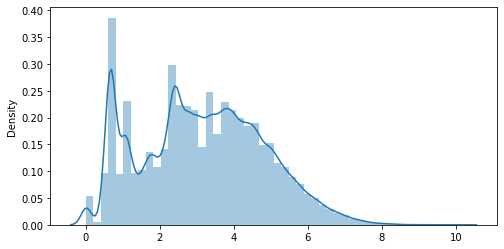

In [53]:
import seaborn as sns

plt.figure(figsize =(8, 4))
sns.distplot(np.log1p(df['Amount']).values.reshape(-1, 1))

In [48]:
X_train, X_test, y_train, y_test = get_train_test_dataset(df)

In [54]:
get_model_train_eval(dt_clf, X_train, X_test, y_train, y_test)

오차 행렬
[[85275    20]
 [   35   113]]
정확되  0.9994, 정밀도:  0.8496, 재현율:  0.7635, F1:  0.8043, AUC:  0.9086


In [55]:
get_model_train_eval(vo_clf, X_train, X_test, y_train, y_test)

오차 행렬
[[85279    16]
 [   46   102]]
정확되  0.9993, 정밀도:  0.8644, 재현율:  0.6892, F1:  0.7669, AUC:  0.9726


In [51]:
get_model_train_eval(lr_clf, X_train, X_test, y_train, y_test)

오차 행렬
[[85283    12]
 [   59    89]]
정확되  0.9992, 정밀도:  0.8812, 재현율:  0.6014, F1:  0.7149, AUC:  0.9727
